In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from sklearn.datasets import load_files

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [3]:
data_dir =  r'/gdrive/My Drive/New data set anugrah/output'
data = load_files(data_dir)

In [4]:
folders=os.listdir("/gdrive/My Drive/New data set anugrah/output")
print(folders)

['Alstonia Scholaris ', 'Arjun ', 'Bael', 'Basil ', 'Chinar ', 'Gauva ', 'Jamun ', 'Jatropha ', 'Lemon ', 'Mango ', 'Pomegranate ', 'Pongamia Pinnata ']


In [5]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# How the arrays look like?
print('Data files - ',X[:10])
print('Target labels - ',y[:10])

Data files -  ['/gdrive/My Drive/New data set anugrah/output/Jamun /Jamun _original_0005_0020.JPG_40564228-66da-4d05-ab60-d8e6cea63cbb.JPG'
 '/gdrive/My Drive/New data set anugrah/output/Bael/Bael_original_IMG_20210412_213835_01.jpg_8b81f6bc-29f2-486a-905b-aea879cb771d.jpg'
 '/gdrive/My Drive/New data set anugrah/output/Alstonia Scholaris /Alstonia Scholaris _original_0003_0025.JPG_6d57c4ad-8fe8-4df1-8181-394c8774768b.JPG'
 '/gdrive/My Drive/New data set anugrah/output/Arjun /Arjun _original_0002_0001.JPG_5d30f7ea-a932-466d-b03b-de197ca67774.JPG'
 '/gdrive/My Drive/New data set anugrah/output/Pongamia Pinnata /Pongamia Pinnata _original_0007_0013.JPG_322a085d-78c2-4bae-9874-608ccaea307f.JPG'
 '/gdrive/My Drive/New data set anugrah/output/Chinar /Chinar _original_0011_0013.JPG_0c49dfa3-886c-4eaa-8a3c-9e435051d772.JPG'
 '/gdrive/My Drive/New data set anugrah/output/Bael/Bael_original_IMG_20210412_213850_01.jpg_133c9b51-aa4f-4b3e-a300-ec8d5012f0f3.jpg'
 '/gdrive/My Drive/New data set anug

In [6]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 224,224
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(2960, 224, 224, 3)
First training item :  [[[36. 42. 54.]
  [40. 46. 58.]
  [40. 47. 57.]
  ...
  [47. 59. 73.]
  [46. 58. 72.]
  [50. 62. 76.]]

 [[42. 49. 59.]
  [38. 45. 55.]
  [40. 47. 57.]
  ...
  [52. 64. 78.]
  [47. 59. 73.]
  [48. 60. 74.]]

 [[36. 43. 53.]
  [42. 49. 59.]
  [42. 49. 59.]
  ...
  [50. 62. 76.]
  [51. 63. 77.]
  [48. 60. 74.]]

 ...

 [[28. 28. 30.]
  [23. 23. 25.]
  [29. 29. 31.]
  ...
  [34. 33. 38.]
  [33. 32. 37.]
  [29. 28. 33.]]

 [[28. 28. 30.]
  [28. 28. 30.]
  [26. 26. 28.]
  ...
  [33. 32. 37.]
  [29. 28. 33.]
  [37. 36. 41.]]

 [[29. 29. 31.]
  [32. 32. 34.]
  [28. 28. 30.]
  ...
  [32. 31. 36.]
  [26. 25. 30.]
  [27. 26. 31.]]]


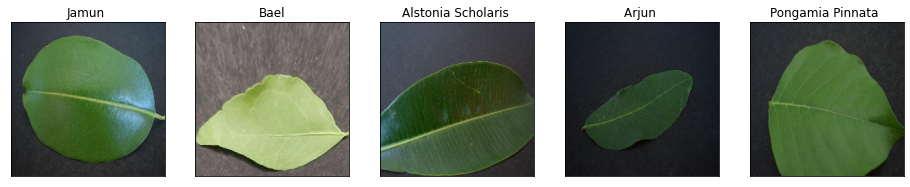

In [7]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [8]:
X = X.astype('float32')/255
no_of_classes = len(np.unique(y))
no_of_classes

12

In [9]:
from keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print('The test Data Shape ', X_test.shape[0])
print('The training data shape ', y_train.shape[0])
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The validation Data Shape ', X_valid.shape[0])
('The test Data Shape after validation ', X_test.shape[0])

The test Data Shape  888
The training data shape  2072
The validation Data Shape  444


('The test Data Shape after validation ', 444)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [31]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Maxpool_1'))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Maxpool_2'))
#model.add(Dropout(0.25))
    
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_6'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_7'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Maxpool_3'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_8'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_9'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_10'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Maxpool_4'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_11'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_12'))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_13'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Maxpool_5'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dense(units=512, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

In [32]:
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.0001)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 100
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = '/gdrive/My Drive/best_weights.h5', save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
# let's get started !
 
history=model.fit(train_generator,
                  epochs=epochs,
                  validation_data = validation_generator,
                  verbose=1,
                  steps_per_epoch=len(X_train) // batch_size,
                  #validation_steps=len(X_valid) //batch_size,
                  callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/100
64/64 [==============================] - 30s 437ms/step - loss: 2.5557 - accuracy: 0.1109 - val_loss: 2.7474 - val_accuracy: 0.1104

Epoch 00001: val_loss improved from inf to 2.74736, saving model to /gdrive/My Drive/best_weights.h5
Epoch 2/100
64/64 [==============================] - 28s 436ms/step - loss: 2.1146 - accuracy: 0.2507 - val_loss: 2.0532 - val_accuracy: 0.3108

Epoch 00002: val_loss improved from 2.74736 to 2.05322, saving model to /gdrive/My Drive/best_weights.h5
Epoch 3/100
64/64 [==============================] - 28s 430ms/step - loss: 1.8454 - accuracy: 0.3334 - val_loss: 1.4275 - val_accuracy: 0.4685

Epoch 00003: val_loss improved from 2.05322 to 1.42750, saving model to /gdrive/My Drive/best_weights.h5
Epoch 4/100
64/64 [==============================] - 28s 439ms/step - loss: 1.5073 - accuracy: 0.4614 - val_loss: 1.4901 - val_accuracy: 0.4640

Epoch 00004: val_loss did not improve from 1.42750
Epoch 5/100
64/64 [==============================] - 28s 4

In [35]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

14/14 - 2s - loss: 0.2197 - accuracy: 0.9685
Accuracy: 96.85%
Loss: 0.21965333819389343


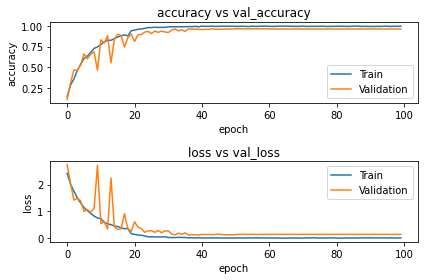

In [36]:
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1)
    #plt.figure(figsize=(10,10)) 
 
     # summarize history for accuracy  
 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
     # summarize history for loss  
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
    
plot(history)

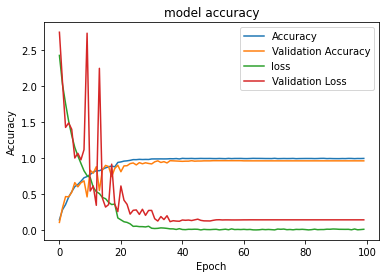

In [37]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

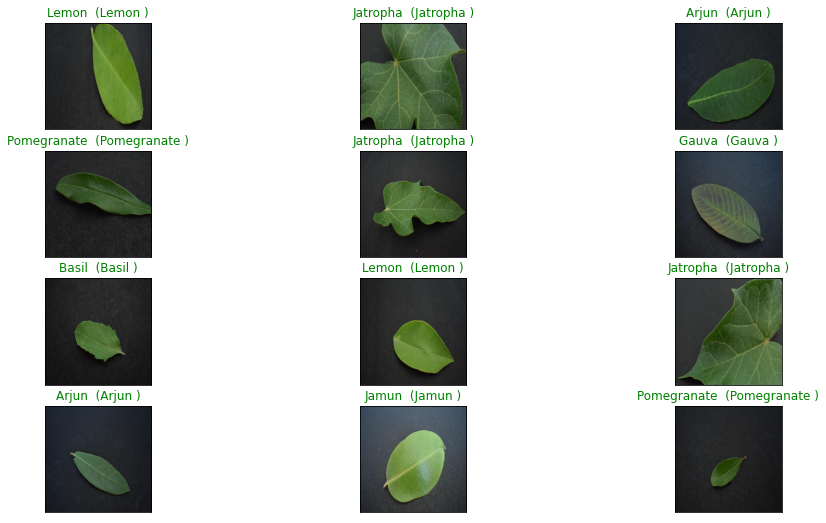

In [38]:
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=12, replace=False)):
        ax = fig.add_subplot(4, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

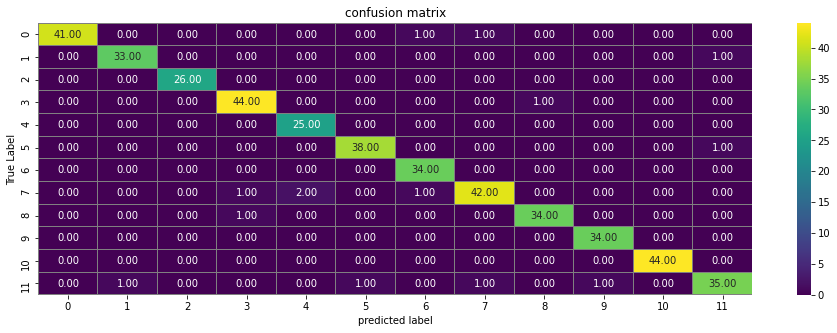

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (16,5))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="viridis",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

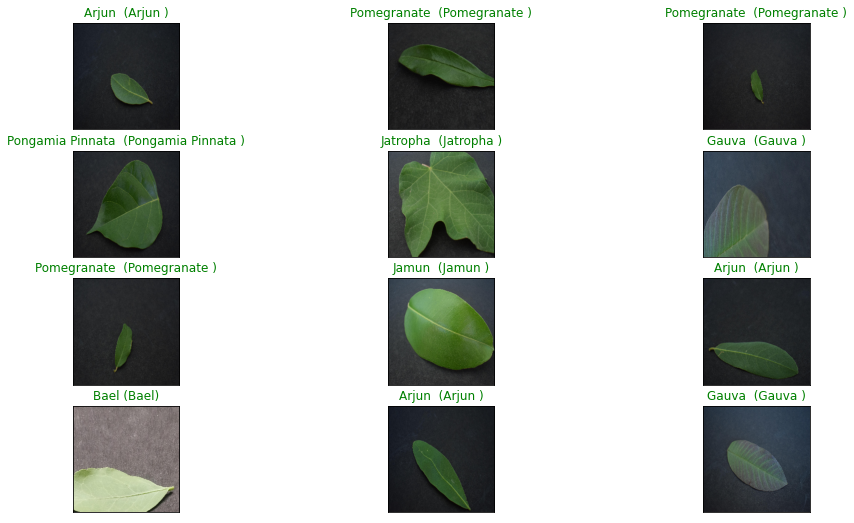

In [40]:
my_model=keras.models.load_model('/gdrive/My Drive/best_weights.h5')

def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=12, replace=False)):
        ax = fig.add_subplot(4, 3, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(my_model.predict(X_test))

In [ ]:
import sklearn
sklearn.metrics.confusion_matrix(Y_true, Y_pred_classes)
plt.imshow(sklearn.metrics.confusion_matrix(Y_true, Y_pred_classes))